In [1]:
#1.=====GBDT的标签--y。每个原子对应一个合力。按照img的顺序+img中原子index顺序输出。=====

import io
import os
import re
import ase
import time
import numpy as np
import pandas as pd
from ase.io.trajectory import Trajectory

# 统计.traj中所有img原子个数.
def get_all_atoms(img_path):
    num_a = 0
    data_all = Trajectory(img_path)
    for i in range(len(data_all)):
        num_a += len(data_all[i])
    print(num_a)
    return num_a


# 获取一个img的所有atom的受力的合力.
def atom_i_fall(img_i):
    atom_num = len(img_i)
    f_m = img_i.get_forces()
    f_all = np.linalg.norm(f_m, axis=1)
    return f_all


# 获取.traj中所有img的所有atom的受力的合力.
def traj_fall(img_p):
    index_ = []
    f0 = np.array([])
    img_all = Trajectory(img_p)

    # 获取这批.traj中所有img的合力.
    for img in img_all:
        f_ = atom_i_fall(img_i=img)
        _f_all = np.concatenate((f0, f_), axis=0)
        f0 = _f_all

    # 详细记录每个atom对应的每个image.
    for i in range(len(img_all)):
        img_i = img_all[i]
        for j in range(len(img_i)):
            atom_index = '{}   |   {}'.format(i, j)
            index_.append(atom_index)
    data_df = pd.DataFrame()
    data_df['Img   |   Atom'] = pd.DataFrame(index_)
    data_df['Force'] = pd.DataFrame(_f_all)
    data_df.to_csv('./atom_all_fall.csv', encoding='utf-8', index=None)
    return None


# traj_fall(img_p='/Users/renzhe/Desktop/g1/1225-6281/train.traj')
get_all_atoms(img_path='./data/1225-6281/train.traj')

112968


112968

In [ ]:
#2.=====合并一个eta-drs里的所有fps。即对于一个eta-drs，按照img中按照原子index排序，对所有的img生成一个csv。=====
'''
eta_all = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
fps_num = [57,43,34,29,25,22,19,17,16,15,13,13,12,11,10,10,9,9,9,8,8,8,7,7,7,7,6,6]
drs = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,0.325,0.350,0.375,0.400,
       0.425,0.450,0.475,0.500,0.525,0.550,0.575,0.600,0.625,0.650,0.675,0.700,0.725,0.75]
'''
import os
import numpy as np
import pandas as pd

print("Program Initiated.")
code_time_s = time.perf_counter()

def com_fps(path_csv,img_num=1225):
    os.chdir(path_csv)
    df_all_ori = pd.DataFrame()
    df_all_nor = pd.DataFrame()
    for i in range(img_num):
        img_i_ori = path_csv + '/Ge_fps_{}_ori.csv'.format(i)
        fps_i_ori = pd.read_csv(img_i_ori)
        fps_i_ori = fps_i_ori.iloc[:,:-15]
        df_all_ori = pd.concat([df_all_ori,fps_i_ori],axis=0)
        
        img_i_nor = path_csv + '/Ge_fps_{}_nor.csv'.format(i)
        fps_i_nor = pd.read_csv(img_i_nor)
        fps_i_nor = fps_i_nor.iloc[:,:-15]
        df_all_nor = pd.concat([df_all_nor,fps_i_nor],axis=0)
    df_all_nor.to_csv('./fps_all_nor.csv')
    df_all_ori.to_csv('./fps_all_ori.csv')
    return None

eta = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
drs = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,0.325,0.350,
       0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,0.575,0.600,0.625,0.650,
       0.675,0.700,0.725,0.75]

for e in eta:
    for d in drs:
        pa_ = 'cd /work/mse-minzw/lrz/g1/{}-{:0.3f}/fps/fps_csv'.format(e,d)
        com_fps(path_csv,img_num=1225)
        print('Done   {}-{:0.3f}'.format(e,d))
code_time_e = time.perf_counter()
print(
    'Program execution completed successfully.Code-Time is {} Sec.'.format(np.round(code_time_e-code_time_s, 2)))

In [ ]:
#3.=====合并一个eta,所有drs里的所有fps。即对于一个eta，将所有drs合并，对所有的img生成一个csv。437个=====
import os
import time
import numpy as np
import pandas as pd

print("Program Initiated.")
code_time_s = time.perf_counter()

eta = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
drs = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,0.325,0.350,
       0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,0.575,0.600,0.625,0.650,
       0.675,0.700,0.725,0.75]

for e in eta:
    print('------------------------eta-{}------------------------'.format(e))
    name_all = []
    df_all = pd.DataFrame()
    for d in drs:
        pa_ = '/work/mse-minzw/lrz/g1/{}-{:0.3f}/fps/fps_csv/fps_all_nor.csv'.format(e,d)
        fps_e_di = pd.read_csv(pa_)
        fps_e_di_ = fps_e_di.iloc[:,1:]
        name_num = fps_e_di_.shape[1]
        df_all = pd.concat([df_all,fps_e_di_],axis=1)
        print('Done-{}-{:0.3f}'.format(e,d))
    df_all.to_csv('./eta-{}-all_fps.csv'.format(e))
    print('Done---------eta = {}'.format(e))
        

code_time_e = time.perf_counter()
print(
    'Program execution completed successfully.Code-Time is {} Sec.'.format(np.round(code_time_e-code_time_s, 2)))


In [57]:
#4.=====对step_3产生的csv原始文件加表头 & 拼接标签y & 写入新.csv文件。=====
import pandas as pd

def head_and_fall_csv():
    # 所有信息
    eta = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
    fps_num = [57,43,34,29,25,22,19,17,16,15,13,13,12,11,10,10,9,9,9,8,8,8,7,7,7,7,6,6]
    drs = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,0.325,0.350,0.375,0.400,
           0.425,0.450,0.475,0.500,0.525,0.550,0.575,0.600,0.625,0.650,0.675,0.700,0.725,0.75]    
    # 设置表头
    head_ = []
    for i in range(len(fps_num)):
        for j in range(fps_num[i]):
            _head_ = 'Rs_{}/{}'.format(drs[i],j)
            head_.append(_head_)    
    # 获取标签y
    f_all = pd.read_csv('/Users/renzhe/Desktop/g1/atom_all_fall.csv')     
    #对原始文件加表头 & 拼接标签y & 写入新.csv文件
    for e in eta:
        path_ = '/Users/renzhe/Desktop/g1/g1_1/old_data/eta-{}-all_fps.csv'.format(e)
        test_csv_oldi = pd.read_csv(path_)
        test_csv_old_ = test_csv_oldi.iloc[:,1:]
        test_csv_old_.rename(columns=dict(zip(test_csv_old_.columns, head_)), inplace=True)
        y_fps_all = pd.concat([f_all, test_csv_old_],axis=1)
        y_fps_all.to_csv('/Users/renzhe/Desktop/g1/g1_1/eta-{}-all_fps.csv'.format(e),index=None)
        print('Finish {}'.format(e))
    return None

        
head_and_fall_csv()

Finish 10
Finish 50
Finish 100
Finish 200
Finish 300
Finish 400
Finish 500
Finish 600
Finish 700
Finish 800
Finish 900
Finish 1000
Finish 1100
Finish 1200
Finish 1300


In [4]:
# 添加原子的index
eta = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
for e in eta:
    path = '/Users/renzhe/Desktop/g1/data/g1_1/eta-{}-all_fps.csv'.format(e)
    ttt = pd.read_csv(path)
    ttt.insert(loc=0, column='Atom_index', value=np.arange(112968))
    ttt.to_csv('/Users/renzhe/Desktop/g1/data/g1_1/data_0223/eta-{}-all_fps.csv'.format(e),index=None)
    print('Finish {}'.format(e))


Finish 10
Finish 50
Finish 100
Finish 200
Finish 300
Finish 400
Finish 500
Finish 600
Finish 700
Finish 800
Finish 900
Finish 1000
Finish 1100
Finish 1200
Finish 1300


In [33]:
#拼接数据1

In [1]:
eta = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
drs = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,0.325,0.350,
       0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,0.575,0.600,0.625,0.650,
       0.675,0.700,0.725,0.75]
# for e in eta:
#     for d in drs:
#         print('cd /work/mse-minzw/lrz/g1/{}-{:0.3f}/fps/fps_csv'.format(e,d))
#         print('  ')

In [40]:
import os
import numpy as np
import pandas as pd

def com_fps(path_csv,img_num=1225):
    os.chdir(path_csv)
    df_all_ori = pd.DataFrame()
    df_all_nor = pd.DataFrame()
    for i in range(img_num):
        img_i_ori = path_csv + '/Ge_fps_{}_ori.csv'.format(i)
        fps_i_ori = pd.read_csv(img_i_ori)
        fps_i_ori = fps_i_ori.iloc[:,:-15]
        df_all_ori = pd.concat([df_all_ori,fps_i_ori],axis=0)
        
        img_i_nor = path_csv + '/Ge_fps_{}_nor.csv'.format(i)
        fps_i_nor = pd.read_csv(img_i_nor)
        fps_i_nor = fps_i_nor.iloc[:,:-15]
        df_all_nor = pd.concat([df_all_nor,fps_i_nor],axis=0)
    df_all_nor.to_csv('./fps_all_nor.csv')
    df_all_ori.to_csv('./fps_all_ori.csv')
    print('D-O-N-E')
    return None

com_fps(path_csv='/work/mse-minzw/lrz/g1/10-0.700/fps/fps_csv',img_num=1225)

FileNotFoundError: [Errno 2] No such file or directory: '/work/mse-minzw/lrz/g1/10-0.700/fps/fps_csv'

In [42]:
#拼接数据2

In [52]:
fps_300_0225 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.225.csv')
fps_300_0250 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.250.csv')

fps_300_0225 = fps_300_0225.iloc[:,1:]
fps_300_0250 = fps_300_0250.iloc[:,1:]

In [53]:
fps_300_0225

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,6.403710e-08,0.000006,0.000409,0.007933,0.059705,0.230050,0.336127,0.298408,0.101448,0.014087,0.001841,0.016069,0.094747,0.308086,0.564055,0.558958,0.366220,0.326394,0.240620
1,3.677789e-08,0.000004,0.000296,0.006325,0.051838,0.214642,0.332599,0.309112,0.108648,0.015407,0.001515,0.008644,0.044046,0.152526,0.395718,0.589228,0.470750,0.357053,0.178744
2,1.366798e-08,0.000001,0.000134,0.003276,0.031340,0.155163,0.294432,0.342762,0.154020,0.028432,0.003542,0.021657,0.122591,0.367616,0.599866,0.559639,0.396326,0.372141,0.243686
3,8.716269e-08,0.000007,0.000483,0.008827,0.063323,0.235275,0.335565,0.294408,0.100095,0.014067,0.002079,0.017256,0.097233,0.322365,0.627865,0.646309,0.365313,0.209757,0.111291
4,6.875364e-08,0.000006,0.000436,0.008375,0.062272,0.236231,0.338758,0.294382,0.097769,0.013313,0.002820,0.021561,0.104250,0.318767,0.555099,0.478481,0.252288,0.180438,0.128713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112963,1.548415e-04,0.002866,0.047039,0.209518,0.379129,0.368006,0.141304,0.034292,0.007234,0.028528,0.087997,0.169473,0.274261,0.392267,0.438932,0.384247,0.259975,0.202882,0.120134
112964,7.513937e-04,0.008373,0.081396,0.222615,0.298706,0.309623,0.172015,0.067443,0.011170,0.009707,0.061411,0.214407,0.410521,0.505972,0.373528,0.188818,0.127640,0.180176,0.178334
112965,5.510713e-04,0.006682,0.071126,0.213126,0.303164,0.311944,0.170490,0.071438,0.033673,0.083405,0.142556,0.152344,0.190126,0.313657,0.361835,0.242206,0.102144,0.062168,0.059820
112966,1.073864e-03,0.013054,0.141004,0.412636,0.487510,0.305787,0.074900,0.011332,0.001100,0.006914,0.047375,0.161209,0.311538,0.442890,0.422406,0.247430,0.121656,0.121234,0.128695


In [54]:
fps_300_0250

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.403710e-08,0.000009,0.000959,0.017009,0.113084,0.319379,0.333764,0.137934,0.018230,0.001841,0.020127,0.128429,0.392942,0.632894,0.425489,0.335972,0.260788
1,3.677789e-08,0.000006,0.000709,0.013973,0.101540,0.308375,0.340982,0.146785,0.019908,0.001515,0.010604,0.059049,0.213033,0.537730,0.521167,0.402870,0.212279
2,1.366798e-08,0.000002,0.000331,0.007600,0.066266,0.248740,0.349916,0.196707,0.035649,0.003542,0.027027,0.163883,0.451886,0.645516,0.439193,0.383255,0.274470
3,8.716269e-08,0.000011,0.001116,0.018603,0.117839,0.321791,0.330145,0.135957,0.018165,0.002079,0.021437,0.131666,0.418606,0.723523,0.470250,0.254837,0.124787
4,6.875364e-08,0.000010,0.001020,0.017891,0.117180,0.324686,0.331702,0.133640,0.017235,0.002820,0.026207,0.138169,0.402289,0.592571,0.325080,0.197816,0.137255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112963,1.548415e-04,0.003973,0.079195,0.277888,0.386914,0.242000,0.058736,0.008103,0.023880,0.087997,0.177944,0.300360,0.408616,0.446719,0.299882,0.223244,0.135719
112964,7.513937e-04,0.010955,0.122157,0.258910,0.299038,0.243981,0.098276,0.017343,0.007858,0.061411,0.234358,0.444696,0.473526,0.293696,0.132451,0.159613,0.184725
112965,5.510713e-04,0.008829,0.108988,0.254350,0.304587,0.242520,0.099737,0.032999,0.074847,0.142556,0.151125,0.211981,0.339542,0.339142,0.146804,0.068905,0.058435
112966,1.073864e-03,0.017273,0.216302,0.475227,0.410357,0.156883,0.022849,0.001545,0.005277,0.047375,0.175717,0.343681,0.448496,0.367799,0.154330,0.114661,0.128581


In [56]:
cat_ = pd.concat([fps_300_0225,fps_300_0250],axis=1)
cat_.to_csv('./cat_fps.csv')

In [62]:
fps_300_0225 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.225.csv',columns=None)
fps_300_0250 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.250.csv')
fps_300_0275 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.275.csv')

fps_300_0225 = fps_300_0225.iloc[:,1:]


fps_300_0250 = fps_300_0250.iloc[:,1:]
fps_300_0275 = fps_300_0275.iloc[:,1:]


fps_allll = [fps_300_0225, fps_300_0250, fps_300_0275]

In [63]:
num = 3
df_all = pd.DataFrame()
for ffffff in fps_allll:
    df_all = pd.concat([df_all,ffffff],axis=1)
    
    
df_all.to_csv('./cat_fps.csv')    

In [5]:
eta = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
drs = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,0.325,0.350,
       0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,0.575,0.600,0.625,0.650,
       0.675,0.700,0.725,0.75]


# for e in eta:
#     print('Work   eta = {}'.format(e))
#     name_all = []
#     df_all = pd.DataFrame()
#     for d in drs:
#         pa_ = '/work/mse-minzw/lrz/g1/{}-{:0.3f}/fps/fps_csv/fps_all_nor.csv'.format(e,d)
#         fps_e_di = pd.read_csv(pa_)
#         fps_e_di_ = fps_e_di.iloc[:,1:]
#         name_num = fps_e_di_.shape[1]
#         _name_ = ['eta-{}-{}'.format(e,i) for i in range(name_num)]
#         name_all += _name_
#         df_all = pd.concat([df_all,fps_e_di_],axis=1)
#         print('Done   {}-{:0.3f}'.format(e,d))
#     df_all.to_csv('./eta-{}-all_fps.csv'.format(e))
#     print('Done   eta = {}'.format(e))
        


In [68]:
fps_300_0225.shape[1]

19

In [69]:
_name_ = ['eta-{}-{}'.format(300,i) for i in range(3)]

In [70]:
_name_

['eta-300-0', 'eta-300-1', 'eta-300-2']

In [72]:
_name_
pd.DataFrame([_name_])

,0,1,2
0,eta-300-0,eta-300-1,eta-300-2


In [22]:
# fps_300_0225 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.225.csv',header=None)
# fps_300_0225 = fps_300_0225.iloc[1:,1:]
# fps_300_0225

In [98]:
fps_300_0225 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.225.csv')
fps_300_0250 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.250.csv')
fps_300_0275 = pd.read_csv('/Users/renzhe/Desktop/eta300/eta300-0.275.csv')

fps_300_0225 = fps_300_0225.iloc[1:,1:]


fps_300_0250 = fps_300_0250.iloc[1:,1:]
fps_300_0275 = fps_300_0275.iloc[1:,1:]


fps_allll = [fps_300_0225, fps_300_0250, fps_300_0275]
num = 3
name_all_ = []
df_all = pd.DataFrame()
for ffffff in fps_allll:
    name_num = ffffff.shape[1]
    _name_ = ['eta-{}'.format(i) for i in range(name_num)]
    name_all_ += _name_ 
    df_all = pd.concat([df_all,ffffff],axis=1)
    
    
df_all.to_csv('./cat_fps.csv',header=name_all_)   

In [100]:
data = pd.read_csv('/Users/renzhe/Desktop/eta-10-all_fps.csv')
f_all = pd.read_csv('./atom_all_fall.csv')

In [23]:
# data = data.iloc[:,1:]
# data

In [24]:
# f_all

In [3]:
#2024.02.23-GBDT for selecting d_Rs(固定eta=200, 600, ...)

In [200]:
import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# select 1w data
sample_n = 10000
# random_state_0 = 1
random_state_0 = 1
pwd = '/Users/renzhe/Desktop/g1/data/g1_1/data_2024.02.23/'
eta = [10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
eta = [200]
for eta_ in eta:
    path_ = os.path.join(pwd, 'eta-{}-all_fps.csv'.format(eta_))
    df_all = pd.read_csv(path_)
    df1w = df_all.sample(n=sample_n, replace=False, random_state=random_state_0, axis=0)
    df1w.to_csv(pwd+'/data1w/eta-{}-1w.csv'.format(eta_), index=False)
    print('Finish', eta_)

Finish 200


In [8]:
import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
def GBDT_model_feature_importance(r_s_1, r_s_2=0):
    # select n-k data from 1W-data
    d_Rs = 200
    n_ks = 1000
    random_state_1 = r_s_1
    random_state_2 = r_s_2
    data1w = pd.read_csv('/Users/renzhe/Desktop/g1/data/g1_1/data_2024.02.23/data1w/eta-{}-1w.csv'.format(d_Rs))

    # 1w
    x1w = data1w.drop(['Atom_index', 'Img   |   Atom', 'Force'], axis=1)
    y1w = data1w['Force'].values

    # for random_state_2 in range(0,1):
    #     for random_state_1 in range(107, 108):
    datank = data1w.sample(n=n_ks, replace=False, random_state=random_state_1, axis=0)
    # nk(eg: 1k)
    xnk = datank.drop(['Atom_index', 'Img   |   Atom', 'Force'], axis=1)
    ynk = datank['Force'].values

    # train-test dataset.
    x_train, x_test, y_train, y_test = train_test_split(xnk, 
                                                        ynk, 
                                                        random_state=random_state_2, 
                                                        train_size=0.99)

    # gbdt-model
    gbr = GradientBoostingRegressor(n_estimators=200, 
                                    max_depth=8, 
                                    min_samples_split=3, 
                                    learning_rate=0.2, 
                                    loss='squared_error')

    # fit model.
    gbr.fit(x_train, y_train.ravel())
    y_gbr = gbr.predict(x_train)
    y_gbr1 = gbr.predict(x_test)
    r2 = r2_score(y_test, y_gbr1)
    mse = mean_squared_error(y_test, y_gbr1)
    rr = np.sqrt(mse)
    if r2 > 0.8 and rr < 0.15:
        print('  random_state_1 = {}'.format(random_state_1))
        print('  random_state_2 = {}'.format(random_state_2))
        print("  R2:", r2)
        print("  RMSE:", rr)
#         joblib.dump(gbr, '/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/train_model_{}_{}.m'.
#                     format(random_state_1, random_state_2))
    print('Finish random_state_1-2: {}-{}'.format(random_state_1, random_state_2))
    if r2 > 0.8 and rr < 0.15:
        feature_importance = gbr.feature__importances_
        sorted_id = sorted(range(len(feature_importance)), 
                        key=lambda k: feature_importance[k], 
                        reverse=True)

        ind = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,
               0.325,0.350,0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,
               0.575,0.600,0.625,0.650,0.675,0.700,0.725,0.75]

        fps_num = [57, 43, 34, 29, 25, 22, 19, 17, 16, 15, 13, 13, 12, 
                   11, 10, 10, 9, 9, 9, 8, 8, 8 , 7, 7, 7, 7, 6, 6]

        df1 = pd.DataFrame(columns=xnk.columns, index=ind)
        print(xnk.columns)
        df1.iloc[0, 0:57] = feature_importance[0:57]
        df1.iloc[1, 57:100] = feature_importance[57:100]
        df1.iloc[2, 100:134] = feature_importance[100:134]
        df1.iloc[3, 134:163] = feature_importance[134:163]
        df1.iloc[4, 163:188] = feature_importance[163:188]
        df1.iloc[5, 188:210] = feature_importance[188:210]
        df1.iloc[6, 210:229] = feature_importance[210:229]
        df1.iloc[7, 229:246] = feature_importance[229:246]
        df1.iloc[8, 246:262] = feature_importance[246:262]
        df1.iloc[9, 262:277] = feature_importance[262:277]
        df1.iloc[10, 277:290] = feature_importance[277:290]
        df1.iloc[11, 290:303] = feature_importance[290:303]
        df1.iloc[12, 303:315] = feature_importance[303:315]
        df1.iloc[13, 315:326] = feature_importance[315:326]
        df1.iloc[14, 326:336] = feature_importance[326:336]
        df1.iloc[15, 336:346] = feature_importance[336:346]
        df1.iloc[16, 346:355] = feature_importance[346:355]
        df1.iloc[17, 355:364] = feature_importance[355:364]
        df1.iloc[18, 364:373] = feature_importance[364:373]
        df1.iloc[19, 373:381] = feature_importance[373:381]
        df1.iloc[20, 381:389] = feature_importance[381:389]
        df1.iloc[21, 389:397] = feature_importance[389:397]
        df1.iloc[22, 397:404] = feature_importance[397:404]
        df1.iloc[23, 404:411] = feature_importance[404:411]
        df1.iloc[24, 411:418] = feature_importance[411:418]
        df1.iloc[25, 418:425] = feature_importance[418:425]
        df1.iloc[26, 425:431] = feature_importance[425:431]
        df1.iloc[27, 432:437] = feature_importance[432:437]
        df1 = df1.fillna(0)

        plt.figure(figsize=(14, 6))
        ax1 = plt.subplot(1, 2, 1)
        df1.plot(kind='barh', stacked=True, align='center', alpha=0.9, ax=ax1)
        plt.xlabel('Importance', size=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        ax1.get_legend().remove()
        # average feature_importance
        feature_importance = gbr.feature_importances_
        sorted_id = sorted(range(len(feature_importance)), 
                        key=lambda k: feature_importance[k], 
                        reverse=True)

        ind = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,
               0.325,0.350,0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,
               0.575,0.600,0.625,0.650,0.675,0.700,0.725,0.75]

        fps_num = [57, 43, 34, 29, 25, 22, 19, 17, 16, 15, 13, 13, 12, 
                   11, 10, 10, 9, 9, 9, 8, 8, 8 , 7, 7, 7, 7, 6, 6]

        df1a = pd.DataFrame(columns=['ave'], index=ind)
        df1a.iloc[0, 0] = np.sum(feature_importance[0:57]) / fps_num[0] 
        df1a.iloc[1, 0] = np.sum(feature_importance[57:100]) / fps_num[1]
        df1a.iloc[2, 0] = np.sum(feature_importance[100:134]) / fps_num[2]
        df1a.iloc[3, 0] = np.sum(feature_importance[134:163]) / fps_num[3]
        df1a.iloc[4, 0] = np.sum(feature_importance[163:188]) / fps_num[4]
        df1a.iloc[5, 0] = np.sum(feature_importance[188:210]) / fps_num[5]
        df1a.iloc[6, 0] = np.sum(feature_importance[210:229]) / fps_num[6]
        df1a.iloc[7, 0] = np.sum(feature_importance[229:246]) / fps_num[7]
        df1a.iloc[8, 0] = np.sum(feature_importance[246:262]) / fps_num[8]
        df1a.iloc[9, 0] = np.sum(feature_importance[262:277]) / fps_num[9]
        df1a.iloc[10, 0] = np.sum(feature_importance[277:290]) / fps_num[10]
        df1a.iloc[11, 0] = np.sum(feature_importance[290:303]) / fps_num[11]
        df1a.iloc[12, 0] = np.sum(feature_importance[303:315]) / fps_num[12]
        df1a.iloc[13, 0] = np.sum(feature_importance[315:326]) / fps_num[13]
        df1a.iloc[14, 0] = np.sum(feature_importance[326:336]) / fps_num[14]
        df1a.iloc[15, 0] = np.sum(feature_importance[336:346]) / fps_num[15]
        df1a.iloc[16, 0] = np.sum(feature_importance[346:355]) / fps_num[16]
        df1a.iloc[17, 0] = np.sum(feature_importance[355:364]) / fps_num[17]
        df1a.iloc[18, 0] = np.sum(feature_importance[364:373]) / fps_num[18]
        df1a.iloc[19, 0] = np.sum(feature_importance[373:381]) / fps_num[19]
        df1a.iloc[20, 0] = np.sum(feature_importance[381:389]) / fps_num[20]
        df1a.iloc[21, 0] = np.sum(feature_importance[389:397]) / fps_num[21]
        df1a.iloc[22, 0] = np.sum(feature_importance[397:404]) / fps_num[22]
        df1a.iloc[23, 0] = np.sum(feature_importance[404:411]) / fps_num[23]
        df1a.iloc[24, 0] = np.sum(feature_importance[411:418]) / fps_num[24]
        df1a.iloc[25, 0] = np.sum(feature_importance[418:425]) / fps_num[25]
        df1a.iloc[26, 0] = np.sum(feature_importance[425:431]) / fps_num[26]
        df1a.iloc[27, 0] = np.sum(feature_importance[432:437]) / fps_num[27]

        plt.figure(figsize=(14, 6))
        ax1 = plt.subplot(1, 2, 1)
        df1a.plot(kind='barh', stacked=True, align='center', alpha=0.8, ax=ax1)
        plt.xlabel('Importance', size=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        ax1.get_legend().remove()
    return gbr

In [4]:
joblib.dump(gbr_, '/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/GBDT_{}_{}_jnbook.m'.format(ss1,ss2))

['/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/GBDT_10_0.m']

In [12]:
ss1 = 0
ss2 = 1
gbr_model = joblib.load('/Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/GBDT_136_0_spyder.m')
feature_importance = gbr_model.feature_importances_
feature_importance

array([1.84242385e-03, 1.96445899e-03, 1.82246436e-01, 1.94545512e-02,
       3.88780880e-06, 7.29140792e-07, 1.42802550e-06, 1.01852408e-04,
       2.08413428e-05, 1.62166938e-05, 2.12522469e-05, 3.34881607e-04,
       6.80812271e-05, 2.97263692e-02, 6.34007882e-05, 6.32979335e-03,
       2.08058048e-05, 4.62299254e-03, 7.66978813e-05, 8.80616950e-04,
       3.89900161e-04, 7.70585418e-04, 1.10987683e-04, 2.70867540e-04,
       7.84390413e-06, 1.10016334e-04, 7.98450292e-05, 3.36078645e-04,
       1.27317620e-03, 5.80306972e-04, 2.12500474e-05, 3.21925464e-03,
       2.71584912e-05, 2.51727041e-04, 6.09717785e-04, 8.27899971e-04,
       6.34020078e-05, 9.52071435e-05, 1.15539636e-04, 5.53006891e-04,
       8.73916520e-06, 1.00863335e-03, 3.77419478e-04, 3.16413215e-04,
       3.84769719e-04, 8.91594348e-05, 4.60808852e-04, 1.42649394e-04,
       2.27803447e-04, 2.26734650e-04, 1.68922254e-04, 4.34514516e-04,
       4.37796068e-05, 5.09770653e-03, 5.47847265e-05, 6.62759811e-04,
      

In [13]:
len(feature_importance)

437

GradientBoostingRegressor(max_depth=8, min_samples_split=3)

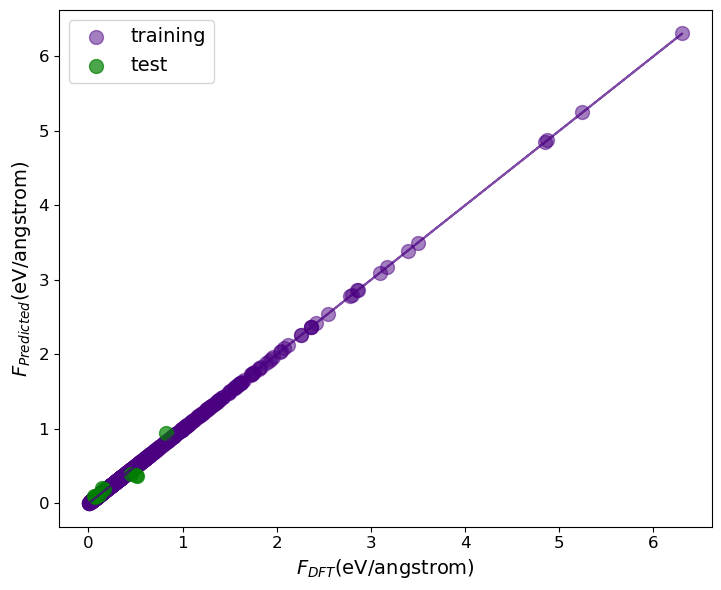

In [333]:
plt.figure(figsize=(14, 6))
ax2 = plt.subplot(1, 2, 2)
plt.plot(y_train, y_train, c='indigo', alpha=0.7)
plt.xlabel('$F_{DFT}$(eV/angstrom)', size=14)
plt.ylabel('$F_{Predicted}$(eV/angstrom)', size=14)
# plt.text(1, 0.4, "RMSE={}".format(np.round(rr, 2)), size=14)
# plt.text(1, 0.3, "R2={}".format(np.round(r2, 2)), size=14)
plt.scatter(y_train, y_gbr, c='indigo', alpha=0.5, s=100, label="training")
plt.scatter(y_test, y_gbr1, c='green', alpha=0.7, s=100, label="test")
plt.legend(loc=2, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [40]:
joblib.dump(gbr_, '/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/GBDT_{}_{}_jnbook.m'.format(ss1,ss2))

['/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/GBDT_188_1_jnbook.m']

  random_state_1 = 19
  random_state_2 = 0
  R2: 0.9914177077175791
  RMSE: 0.1198983499455526
Finish random_state_1-2: 19-0
Index(['Rs_0.075/0', 'Rs_0.075/1', 'Rs_0.075/2', 'Rs_0.075/3', 'Rs_0.075/4',
       'Rs_0.075/5', 'Rs_0.075/6', 'Rs_0.075/7', 'Rs_0.075/8', 'Rs_0.075/9',
       ...
       'Rs_0.725/2', 'Rs_0.725/3', 'Rs_0.725/4', 'Rs_0.725/5', 'Rs_0.75/0',
       'Rs_0.75/1', 'Rs_0.75/2', 'Rs_0.75/3', 'Rs_0.75/4', 'Rs_0.75/5'],
      dtype='object', length=437)


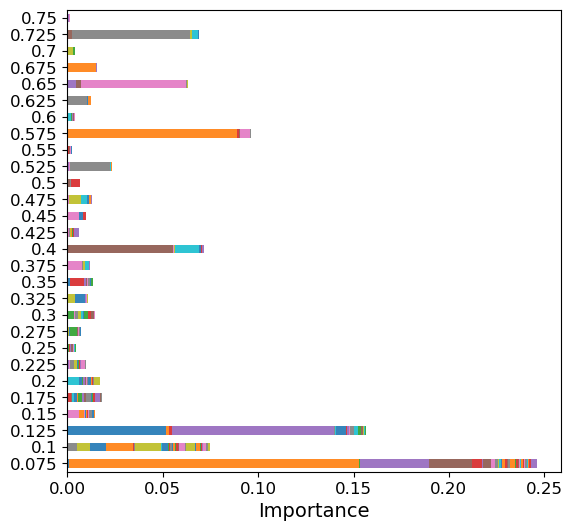

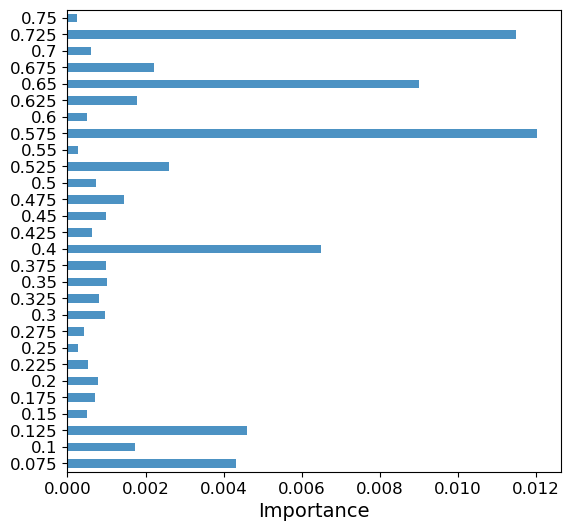

In [9]:
ss1 = 19
ss2 = 0
gbr_ = GBDT_model_feature_importance(r_s_1=ss1,r_s_2=ss2)

  random_state_1 = 214
  random_state_2 = 1
  R2: 0.9391746534915711
  RMSE: 0.1065861852635197
Finish random_state_1-2: 214-1


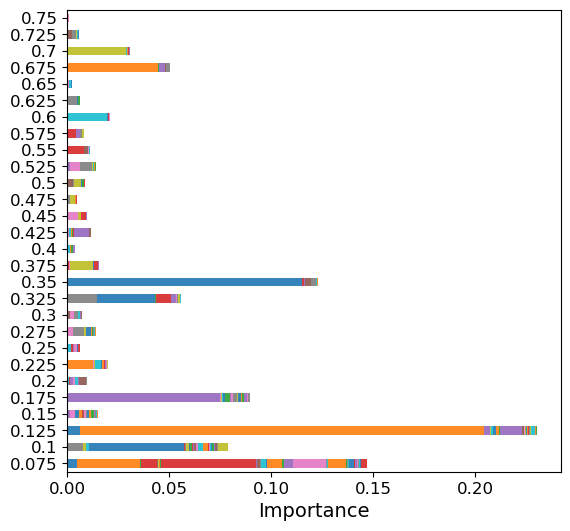

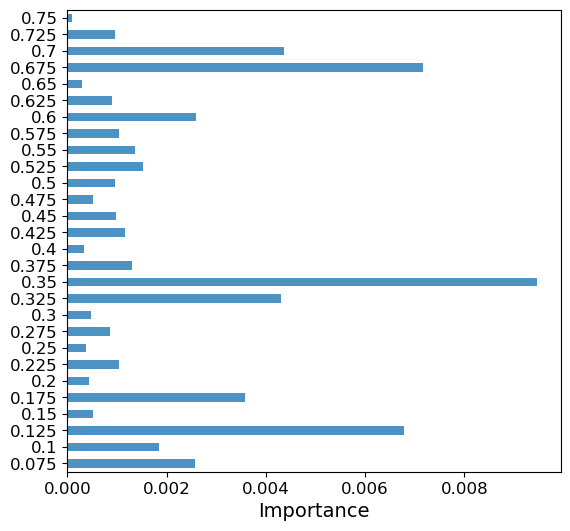

In [49]:
ss1 = 214
ss2 = 1
gbr_ = GBDT_model_feature_importance(r_s_1=ss1,r_s_2=ss2)

In [47]:
joblib.dump(gbr_, '/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/GBDT_{}_{}_jnbook.m'.format(ss1,ss2))

['/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/GBDT_211_1_jnbook.m']

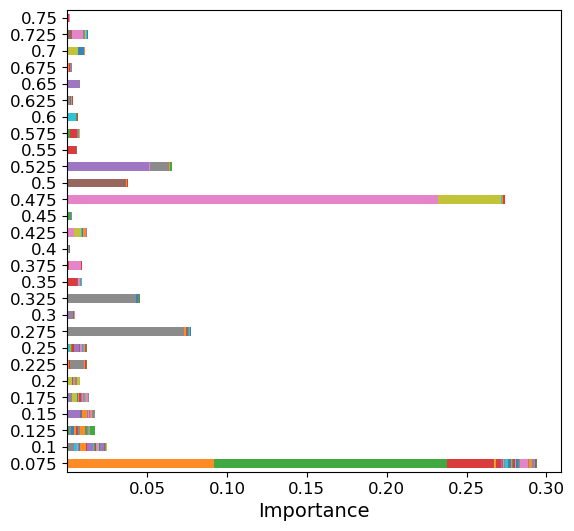

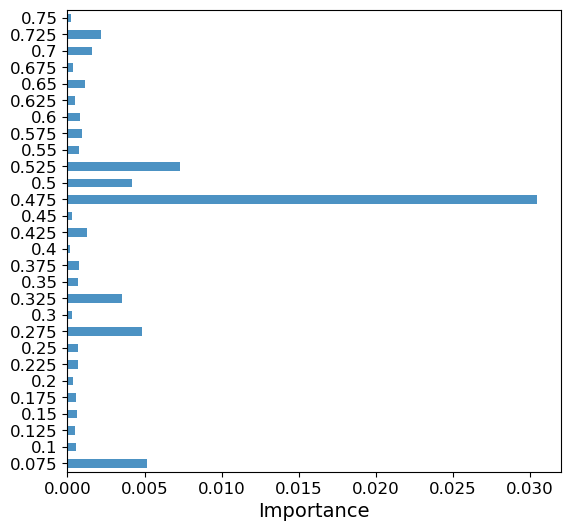

In [13]:
# 读取模型 GBDT_188_1_jnbook.m
import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
data1w = pd.read_csv('/Users/renzhe/Desktop/g1/data/g1_1/data_2024.02.23/data1w/eta-{}-1w.csv'.format(200))
xnk = data1w.drop(['Atom_index', 'Img   |   Atom', 'Force'], axis=1)


gbr_0475 = joblib.load('/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/GBDT_188_1_jnbook.m')
feature_importance = gbr_0475.feature_importances_
sorted_id = sorted(range(len(feature_importance)), 
                key=lambda k: feature_importance[k], 
                reverse=True)
ind = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,
       0.325,0.350,0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,
       0.575,0.600,0.625,0.650,0.675,0.700,0.725,0.75]

fps_num = [57, 43, 34, 29, 25, 22, 19, 17, 16, 15, 13, 13, 12, 
           11, 10, 10, 9, 9, 9, 8, 8, 8 , 7, 7, 7, 7, 6, 6]

df1 = pd.DataFrame(columns=xnk.columns, index=ind)
df1.iloc[0, 0:57] = feature_importance[0:57]
df1.iloc[1, 57:100] = feature_importance[57:100]
df1.iloc[2, 100:134] = feature_importance[100:134]
df1.iloc[3, 134:163] = feature_importance[134:163]
df1.iloc[4, 163:188] = feature_importance[163:188]
df1.iloc[5, 188:210] = feature_importance[188:210]
df1.iloc[6, 210:229] = feature_importance[210:229]
df1.iloc[7, 229:246] = feature_importance[229:246]
df1.iloc[8, 246:262] = feature_importance[246:262]
df1.iloc[9, 262:277] = feature_importance[262:277]
df1.iloc[10, 277:290] = feature_importance[277:290]
df1.iloc[11, 290:303] = feature_importance[290:303]
df1.iloc[12, 303:315] = feature_importance[303:315]
df1.iloc[13, 315:326] = feature_importance[315:326]
df1.iloc[14, 326:336] = feature_importance[326:336]
df1.iloc[15, 336:346] = feature_importance[336:346]
df1.iloc[16, 346:355] = feature_importance[346:355]
df1.iloc[17, 355:364] = feature_importance[355:364]
df1.iloc[18, 364:373] = feature_importance[364:373]
df1.iloc[19, 373:381] = feature_importance[373:381]
df1.iloc[20, 381:389] = feature_importance[381:389]
df1.iloc[21, 389:397] = feature_importance[389:397]
df1.iloc[22, 397:404] = feature_importance[397:404]
df1.iloc[23, 404:411] = feature_importance[404:411]
df1.iloc[24, 411:418] = feature_importance[411:418]
df1.iloc[25, 418:425] = feature_importance[418:425]
df1.iloc[26, 425:431] = feature_importance[425:431]
df1.iloc[27, 432:437] = feature_importance[432:437]
df1 = df1.fillna(0)


plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df1.plot(kind='barh', stacked=True, align='center', alpha=0.9, ax=ax1)
plt.xlabel('Importance', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.get_legend().remove()
# average feature_importance
feature_importance = gbr_0475.feature_importances_
sorted_id = sorted(range(len(feature_importance)), 
                key=lambda k: feature_importance[k], 
                reverse=True)

df1a = pd.DataFrame(columns=['ave'], index=ind)
df1a.iloc[0, 0] = np.sum(feature_importance[0:57]) / fps_num[0] 
df1a.iloc[1, 0] = np.sum(feature_importance[57:100]) / fps_num[1]
df1a.iloc[2, 0] = np.sum(feature_importance[100:134]) / fps_num[2]
df1a.iloc[3, 0] = np.sum(feature_importance[134:163]) / fps_num[3]
df1a.iloc[4, 0] = np.sum(feature_importance[163:188]) / fps_num[4]
df1a.iloc[5, 0] = np.sum(feature_importance[188:210]) / fps_num[5]
df1a.iloc[6, 0] = np.sum(feature_importance[210:229]) / fps_num[6]
df1a.iloc[7, 0] = np.sum(feature_importance[229:246]) / fps_num[7]
df1a.iloc[8, 0] = np.sum(feature_importance[246:262]) / fps_num[8]
df1a.iloc[9, 0] = np.sum(feature_importance[262:277]) / fps_num[9]
df1a.iloc[10, 0] = np.sum(feature_importance[277:290]) / fps_num[10]
df1a.iloc[11, 0] = np.sum(feature_importance[290:303]) / fps_num[11]
df1a.iloc[12, 0] = np.sum(feature_importance[303:315]) / fps_num[12]
df1a.iloc[13, 0] = np.sum(feature_importance[315:326]) / fps_num[13]
df1a.iloc[14, 0] = np.sum(feature_importance[326:336]) / fps_num[14]
df1a.iloc[15, 0] = np.sum(feature_importance[336:346]) / fps_num[15]
df1a.iloc[16, 0] = np.sum(feature_importance[346:355]) / fps_num[16]
df1a.iloc[17, 0] = np.sum(feature_importance[355:364]) / fps_num[17]
df1a.iloc[18, 0] = np.sum(feature_importance[364:373]) / fps_num[18]
df1a.iloc[19, 0] = np.sum(feature_importance[373:381]) / fps_num[19]
df1a.iloc[20, 0] = np.sum(feature_importance[381:389]) / fps_num[20]
df1a.iloc[21, 0] = np.sum(feature_importance[389:397]) / fps_num[21]
df1a.iloc[22, 0] = np.sum(feature_importance[397:404]) / fps_num[22]
df1a.iloc[23, 0] = np.sum(feature_importance[404:411]) / fps_num[23]
df1a.iloc[24, 0] = np.sum(feature_importance[411:418]) / fps_num[24]
df1a.iloc[25, 0] = np.sum(feature_importance[418:425]) / fps_num[25]
df1a.iloc[26, 0] = np.sum(feature_importance[425:431]) / fps_num[26]
df1a.iloc[27, 0] = np.sum(feature_importance[432:437]) / fps_num[27]

plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df1a.plot(kind='barh', stacked=True, align='center', alpha=0.8, ax=ax1)
plt.xlabel('Importance', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.get_legend().remove()

In [3]:
import io
import os
import re
import ase
import time
import numpy as np
import pandas as pd
from ase.io.trajectory import Trajectory

import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

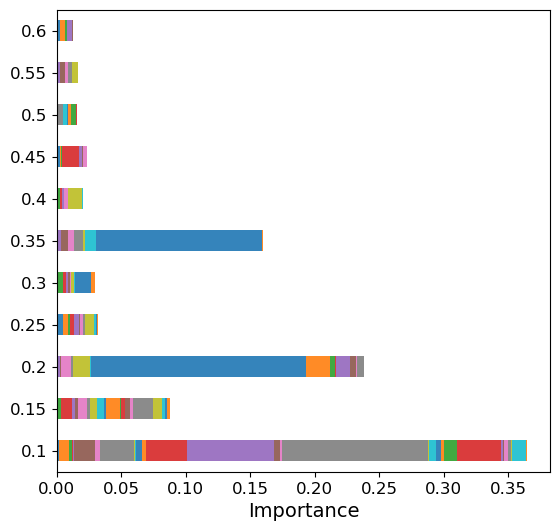

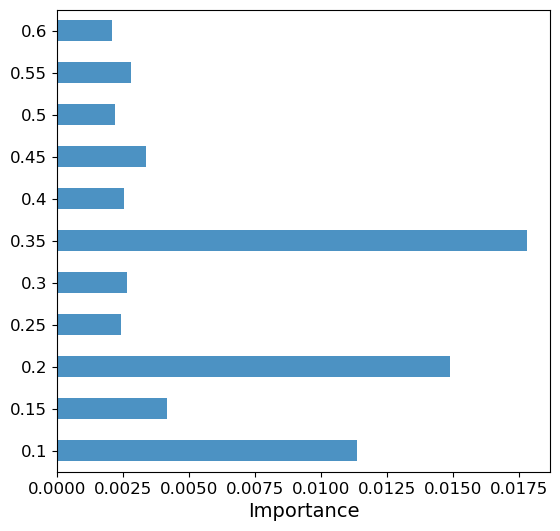

In [4]:
import joblib
mo = joblib.load('/Users/renzhe/Desktop/g2/zata_all/model/train_model_2_0_0.35.m')
pat='/Users/renzhe/Desktop/g2/zata_all/dataall/zata-50-1w.csv'
data1w = pd.read_csv(pat)
random_state_1=1111
n_ks = 1000
x1w = data1w.drop(['Img   |   Atom', 'Force'], axis=1)
y1w = data1w['Force'].values    
# nk(eg: 1k)
datank = data1w.sample(n=n_ks, replace=False, random_state=random_state_1, axis=0)
xnk = datank.drop(['Img   |   Atom', 'Force'], axis=1)
ynk = datank['Force'].values
feature_importance = mo.feature_importances_
fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6] # sum(fps_num) = 136
d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
df1 = pd.DataFrame(columns=xnk.columns, index=d_thetas)
df1.iloc[0, 0:32] = feature_importance[0:32]
df1.iloc[1, 32:53] = feature_importance[32:53]
df1.iloc[2, 53:69] = feature_importance[53:69]
df1.iloc[3, 69:82] = feature_importance[69:82]
df1.iloc[4, 82:93] = feature_importance[82:93]
df1.iloc[5, 93:102] = feature_importance[93:102]
df1.iloc[6, 102:110] = feature_importance[102:110]
df1.iloc[7, 110:117] = feature_importance[110:117]
df1.iloc[8, 117:124] = feature_importance[117:124]
df1.iloc[9, 124:130] = feature_importance[124:130]
df1.iloc[10, 130:136] = feature_importance[130:136]        
df1 = df1.fillna(0)
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df1.plot(kind='barh', stacked=True, align='center', alpha=0.9, ax=ax1)
plt.xlabel('Importance', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.get_legend().remove()        
# average feature_importance
feature_importance = mo.feature_importances_      
df1a = pd.DataFrame(columns=['ave'], index=d_thetas)
df1a.iloc[0, 0] = np.sum(feature_importance[0:32]) / fps_num[0] 
df1a.iloc[1, 0] = np.sum(feature_importance[32:53]) / fps_num[1]
df1a.iloc[2, 0] = np.sum(feature_importance[53:69]) / fps_num[2]
df1a.iloc[3, 0] = np.sum(feature_importance[69:82]) / fps_num[3]
df1a.iloc[4, 0] = np.sum(feature_importance[82:93]) / fps_num[4]
df1a.iloc[5, 0] = np.sum(feature_importance[93:102]) / fps_num[5]
df1a.iloc[6, 0] = np.sum(feature_importance[102:110]) / fps_num[6]
df1a.iloc[7, 0] = np.sum(feature_importance[110:117]) / fps_num[7]
df1a.iloc[8, 0] = np.sum(feature_importance[117:124]) / fps_num[8]
df1a.iloc[9, 0] = np.sum(feature_importance[124:130]) / fps_num[9]
df1a.iloc[10, 0] = np.sum(feature_importance[130:136]) / fps_num[10]
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df1a.plot(kind='barh', stacked=True, align='center', alpha=0.8, ax=ax1)
plt.xlabel('Importance', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.get_legend().remove()


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

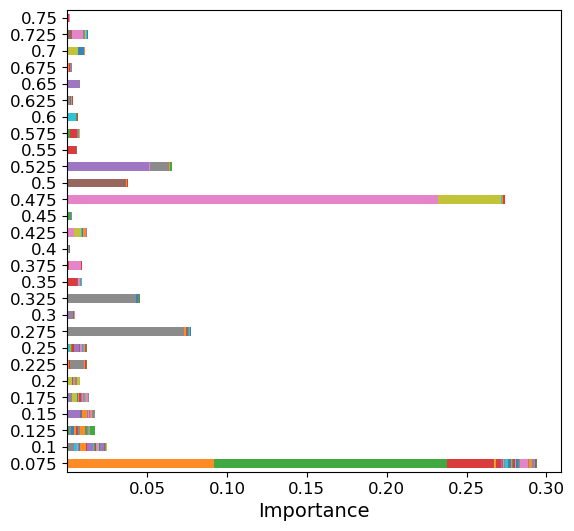

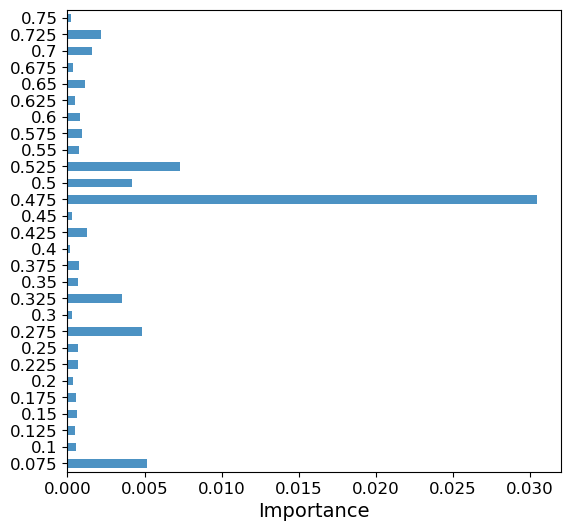

In [19]:
# 读取模型 GBDT_188_1_jnbook.m or 0475G1.m
import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
data1w = pd.read_csv('/Users/renzhe/Desktop/project2/g1/data/g1_1/data_2024.02.23/data1w/eta-{}-1w.csv'.format(200))
xnk = data1w.drop(['Atom_index', 'Img   |   Atom', 'Force'], axis=1)


gbr_0475 = joblib.load('/Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/0475G1.m')
feature_importance = gbr_0475.feature_importances_
sorted_id = sorted(range(len(feature_importance)), 
                key=lambda k: feature_importance[k], 
                reverse=True)

ind = [0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,
       0.325,0.350,0.375,0.400,0.425,0.450,0.475,0.500,0.525,0.550,
       0.575,0.600,0.625,0.650,0.675,0.700,0.725,0.75]

fps_num = [57, 43, 34, 29, 25, 22, 19, 17, 16, 15, 13, 13, 12, 
           11, 10, 10, 9, 9, 9, 8, 8, 8 , 7, 7, 7, 7, 6, 6]

df1 = pd.DataFrame(columns=xnk.columns, index=ind)
df1.iloc[0, 0:57] = feature_importance[0:57]
df1.iloc[1, 57:100] = feature_importance[57:100]
df1.iloc[2, 100:134] = feature_importance[100:134]
df1.iloc[3, 134:163] = feature_importance[134:163]
df1.iloc[4, 163:188] = feature_importance[163:188]
df1.iloc[5, 188:210] = feature_importance[188:210]
df1.iloc[6, 210:229] = feature_importance[210:229]
df1.iloc[7, 229:246] = feature_importance[229:246]
df1.iloc[8, 246:262] = feature_importance[246:262]
df1.iloc[9, 262:277] = feature_importance[262:277]
df1.iloc[10, 277:290] = feature_importance[277:290]
df1.iloc[11, 290:303] = feature_importance[290:303]
df1.iloc[12, 303:315] = feature_importance[303:315]
df1.iloc[13, 315:326] = feature_importance[315:326]
df1.iloc[14, 326:336] = feature_importance[326:336]
df1.iloc[15, 336:346] = feature_importance[336:346]
df1.iloc[16, 346:355] = feature_importance[346:355]
df1.iloc[17, 355:364] = feature_importance[355:364]
df1.iloc[18, 364:373] = feature_importance[364:373]
df1.iloc[19, 373:381] = feature_importance[373:381]
df1.iloc[20, 381:389] = feature_importance[381:389]
df1.iloc[21, 389:397] = feature_importance[389:397]
df1.iloc[22, 397:404] = feature_importance[397:404]
df1.iloc[23, 404:411] = feature_importance[404:411]
df1.iloc[24, 411:418] = feature_importance[411:418]
df1.iloc[25, 418:425] = feature_importance[418:425]
df1.iloc[26, 425:431] = feature_importance[425:431]
df1.iloc[27, 432:437] = feature_importance[432:437]
df1 = df1.fillna(0)


plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df1.plot(kind='barh', stacked=True, align='center', alpha=0.9, ax=ax1)
plt.xlabel('Importance', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.get_legend().remove()
# average feature_importance
feature_importance = gbr_0475.feature_importances_
sorted_id = sorted(range(len(feature_importance)), 
                key=lambda k: feature_importance[k], 
                reverse=True)

df1a = pd.DataFrame(columns=['ave'], index=ind)
df1a.iloc[0, 0] = np.sum(feature_importance[0:57]) / fps_num[0] 
df1a.iloc[1, 0] = np.sum(feature_importance[57:100]) / fps_num[1]
df1a.iloc[2, 0] = np.sum(feature_importance[100:134]) / fps_num[2]
df1a.iloc[3, 0] = np.sum(feature_importance[134:163]) / fps_num[3]
df1a.iloc[4, 0] = np.sum(feature_importance[163:188]) / fps_num[4]
df1a.iloc[5, 0] = np.sum(feature_importance[188:210]) / fps_num[5]
df1a.iloc[6, 0] = np.sum(feature_importance[210:229]) / fps_num[6]
df1a.iloc[7, 0] = np.sum(feature_importance[229:246]) / fps_num[7]
df1a.iloc[8, 0] = np.sum(feature_importance[246:262]) / fps_num[8]
df1a.iloc[9, 0] = np.sum(feature_importance[262:277]) / fps_num[9]
df1a.iloc[10, 0] = np.sum(feature_importance[277:290]) / fps_num[10]
df1a.iloc[11, 0] = np.sum(feature_importance[290:303]) / fps_num[11]
df1a.iloc[12, 0] = np.sum(feature_importance[303:315]) / fps_num[12]
df1a.iloc[13, 0] = np.sum(feature_importance[315:326]) / fps_num[13]
df1a.iloc[14, 0] = np.sum(feature_importance[326:336]) / fps_num[14]
df1a.iloc[15, 0] = np.sum(feature_importance[336:346]) / fps_num[15]
df1a.iloc[16, 0] = np.sum(feature_importance[346:355]) / fps_num[16]
df1a.iloc[17, 0] = np.sum(feature_importance[355:364]) / fps_num[17]
df1a.iloc[18, 0] = np.sum(feature_importance[364:373]) / fps_num[18]
df1a.iloc[19, 0] = np.sum(feature_importance[373:381]) / fps_num[19]
df1a.iloc[20, 0] = np.sum(feature_importance[381:389]) / fps_num[20]
df1a.iloc[21, 0] = np.sum(feature_importance[389:397]) / fps_num[21]
df1a.iloc[22, 0] = np.sum(feature_importance[397:404]) / fps_num[22]
df1a.iloc[23, 0] = np.sum(feature_importance[404:411]) / fps_num[23]
df1a.iloc[24, 0] = np.sum(feature_importance[411:418]) / fps_num[24]
df1a.iloc[25, 0] = np.sum(feature_importance[418:425]) / fps_num[25]
df1a.iloc[26, 0] = np.sum(feature_importance[425:431]) / fps_num[26]
df1a.iloc[27, 0] = np.sum(feature_importance[432:437]) / fps_num[27]

plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df1a.plot(kind='barh', stacked=True, align='center', alpha=0.8, ax=ax1)
plt.xlabel('Importance', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.get_legend().remove()